## **Problem Statement:**
- Build a sentiment analysis model using Recurrent Neural Networks (RNNs) to
classify movie reviews from the IMDB dataset into positive or negative
sentiments.

## **Dataset:**
- The dataset comprises 25,000 movie reviews from IMDB, labeled by sentiment
(positive/negative).
- Reviews have been preprocessed, and each review is
encoded as a sequence of word indices (integers).
- The words in the dataset are
indexed by overall frequency in the dataset, allowing for quick filtering operations
such as: `"only consider the top 10,000 most common words, but eliminate the top
20 most common words"`.


**Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras import regularizers
import numpy as np

In [2]:
# Only keep top 10,000 words in the dataset
vocab_size = 10000
maxlen = 300

# Load raw IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data()

# Replace indices >= vocab_size with 2; 2 represents the <UNK> (unknown word) token
x_train = [[word if word < vocab_size else 2 for word in review] for review in x_train]
x_test = [[word if word < vocab_size else 2 for word in review] for review in x_test]

# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

**Build the RNN Model**

In [3]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64),
    SimpleRNN(units=64, activation='tanh'),
    Dense(1, activation='sigmoid')
])

**Compile the Model**

In [4]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.00009),
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Train the Model**

In [5]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.5223 - loss: 0.6923 - val_accuracy: 0.6428 - val_loss: 0.6430
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7032 - loss: 0.5920 - val_accuracy: 0.6686 - val_loss: 0.6072
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7963 - loss: 0.4847 - val_accuracy: 0.7802 - val_loss: 0.4753
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8452 - loss: 0.3879 - val_accuracy: 0.8218 - val_loss: 0.4113
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8683 - loss: 0.3430 - val_accuracy: 0.8310 - val_loss: 0.3901
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8936 - loss: 0.2894 - val_accuracy: 0.8304 - val_loss: 0.3939
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9142 - loss: 0.2484 - val_accuracy: 0.8490 - val_loss: 0.3683
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9223 - loss: 0.2264 - val_accu

**Evaluate the Model**

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8512 - loss: 0.3656

Test Accuracy: 0.8493


**Plot Training History (Accuracy and Loss)**

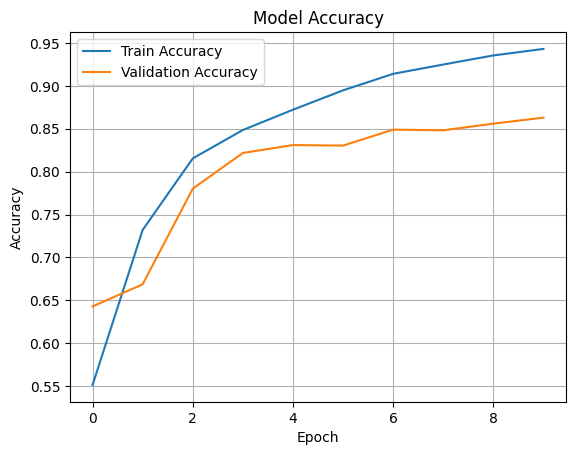

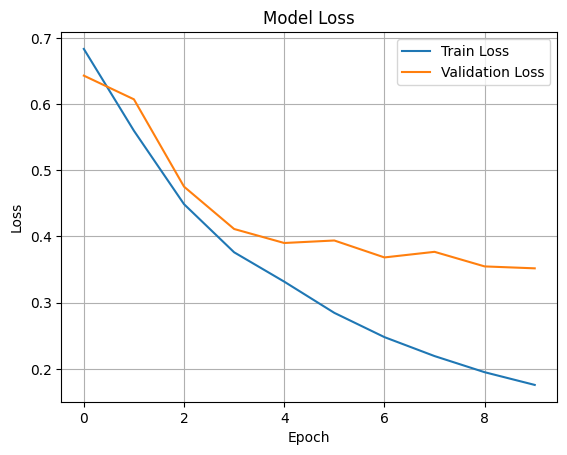

In [7]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**WordCLoud**

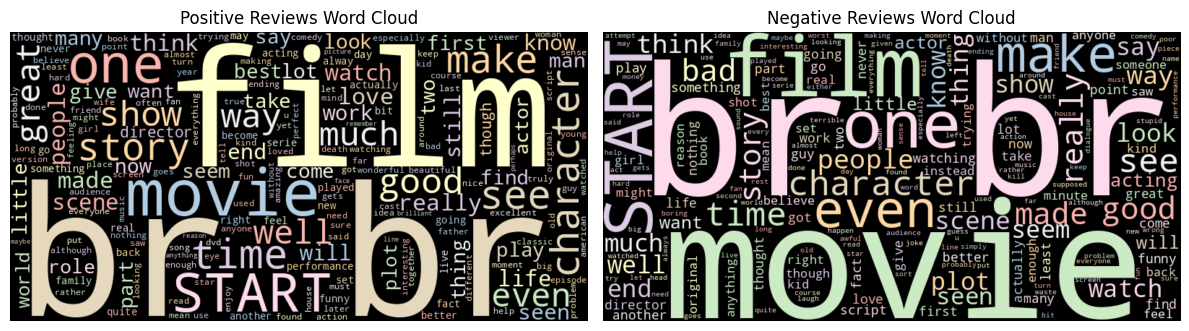

In [8]:
from wordcloud import WordCloud

# Load full data
(x_train, y_train), _ = imdb.load_data()
word_index = imdb.get_word_index()
reverse_word_index = {v + 3: k for k, v in word_index.items()}
reverse_word_index[0] = '<PAD>'
reverse_word_index[1] = '<START>'
reverse_word_index[2] = '<UNK>'

# Decode reviews
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

# Separate positive and negative reviews
positive_reviews = [decode_review(x_train[i]) for i in range(len(x_train)) if y_train[i] == 1]
negative_reviews = [decode_review(x_train[i]) for i in range(len(x_train)) if y_train[i] == 0]

# Combine into text
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Generate WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Positive Reviews Word Cloud")
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Negative Reviews Word Cloud")
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.tight_layout()
plt.show()


**Real Reviews With Predictions**

In [9]:
def display_review_prediction(index):
    review_text = decode_review(x_test[index])
    pred = model.predict(np.expand_dims(x_test[index], axis=0))[0][0]
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"\nReview:\n{review_text}\n")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {pred:.2f})")
    print(f"Actual Sentiment: {'Positive' if y_test[index] == 1 else 'Negative'}")

# Example
display_review_prediction(42)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Review:
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> having been a godzilla fan for many years gamera was to me a cheap <UNK> to capitalize on the success of <UNK> 1 <UNK> star attack of the monsters was for me at the time 1975 an almost painful viewing experience br br last weekend i attended the <UNK> godzilla fest known as g fest where carl craig one of the stars of gamera vs made an appearance of course they featured this movie it was one of the most hilarious bad movies ever